In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
#With discharge
file_path = r"C:\Users\ashis\Github\lstm_backward\results\with_discharge\y_obs.csv"
y_obs = pd.read_csv(file_path, parse_dates=[0])
# Set the unnamed first column (dates) as the index
y_obs.set_index(y_obs.columns[0],inplace=True)
file_path = r'C:\Users\ashis\Github\lstm_backward\results\with_discharge\y_sim.csv'
y_sim = pd.read_csv(file_path, parse_dates=[0])
file_path = r'C:\Users\ashis\Github\lstm_backward\results\with_discharge\NSE.csv'
nse_disch = pd.read_csv(file_path)
# Set the unnamed first column (dates) as the index
y_sim.set_index(y_sim.columns[0],inplace=True)
file_path = r'C:\Users\ashis\Github\lstm_backward\results\without_discharge\y_sim.csv'
y_sim_no_disch = pd.read_csv(file_path, parse_dates=[0])
# Set the unnamed first column (dates) as the index
y_sim_no_disch.set_index(y_sim_no_disch.columns[0],inplace=True)
file_path = r'C:\Users\ashis\Github\lstm_backward\results\without_discharge\NSE.csv'
nse_without_disch = pd.read_csv(file_path)

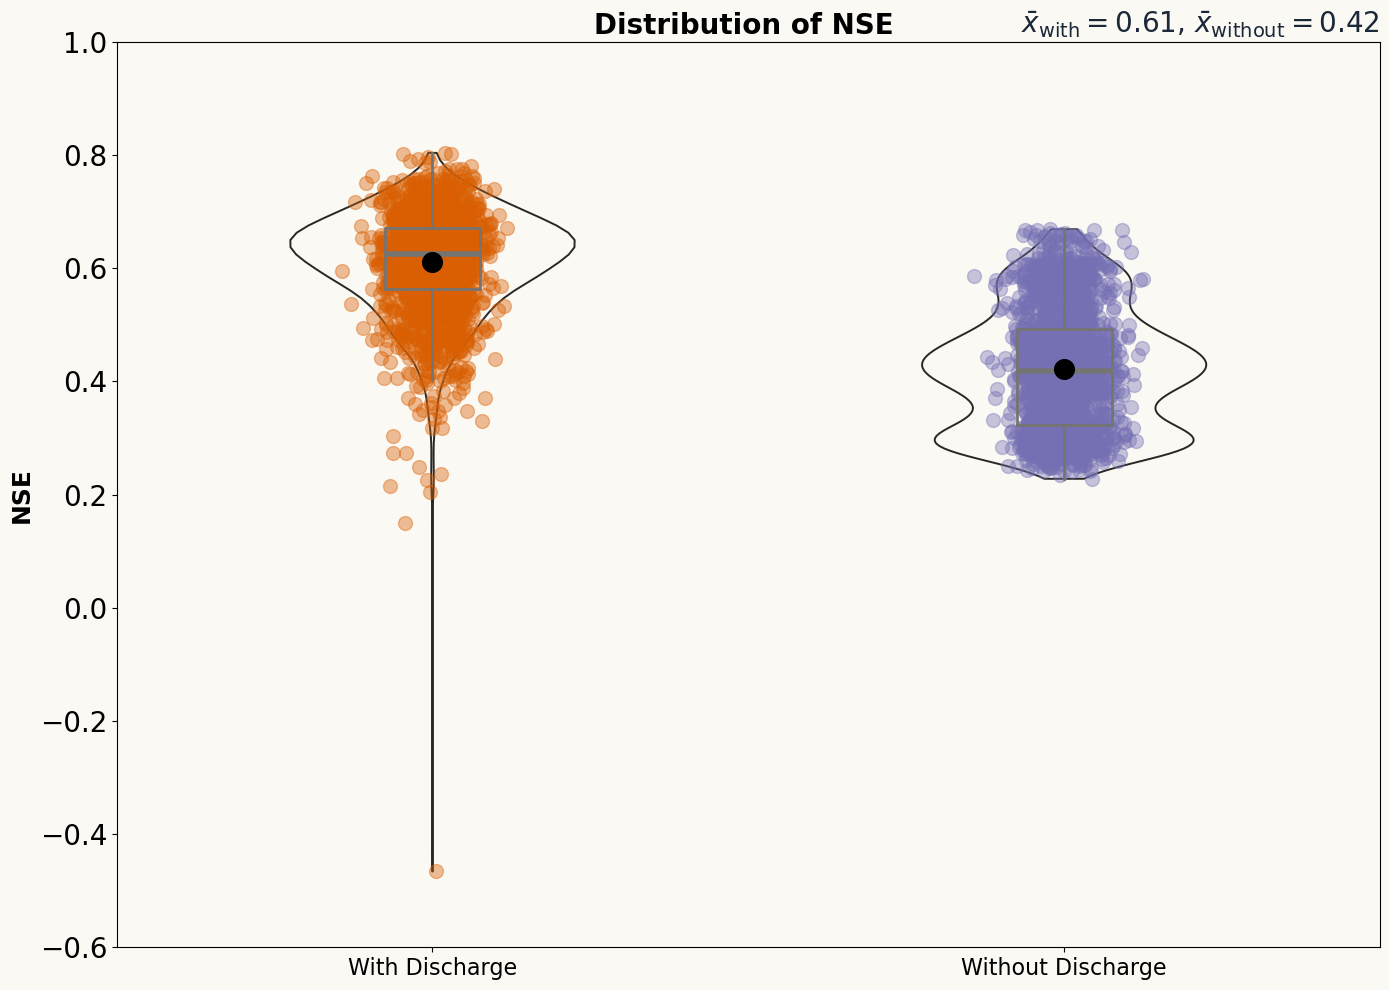

In [5]:
# Define colors and layout constants
# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"
POSITIONS = [1, 2]  # Positions for the violin plots
HLINES = np.arange(-0.5, 1.1, 0.1)  # Horizontal lines for reference

nse_disch_values = nse_disch['NSE'].dropna()
nse_without_disch_values = nse_without_disch['NSE'].dropna()

#nse_disch_values = nse_disch_values[nse_disch_values >= 0]  # Keep only non-negative values
#nse_without_disch_values = nse_without_disch_values[nse_without_disch_values >= 0]  # Keep only non-negative values

# Data for plotting
y_data = [nse_disch_values, nse_without_disch_values]
x_jittered = [np.random.normal(pos, 0.04, size=len(y)) for pos, y in zip(POSITIONS, y_data)]

# Colors taken from Dark2 palette in RColorBrewer R library
COLOR_SCALE = [ "#D95F02", "#7570B3"]

# Create the plot
fig, ax = plt.subplots(figsize=(14, 10))

# Background color
fig.patch.set_facecolor(BG_WHITE)
ax.set_facecolor(BG_WHITE)


# Add violins
violins = ax.violinplot(
    y_data, 
    positions=POSITIONS,
    widths=0.45,
    bw_method="silverman",
    showmeans=False, 
    showmedians=False,
    showextrema=False
)

# Customize violins
for pc in violins["bodies"]:
    pc.set_facecolor("none")
    pc.set_edgecolor(BLACK)
    pc.set_linewidth(1.4)
    pc.set_alpha(1)

# Add boxplots
medianprops = dict(
    linewidth=4, 
    color=GREY_DARK,
    solid_capstyle="butt"
)
boxprops = dict(
    linewidth=2, 
    color=GREY_DARK
)

ax.boxplot(
    y_data,
    positions=POSITIONS, 
    showfliers=False,  # Do not show the outliers beyond the caps
    showcaps=False,    # Do not show the caps
    medianprops=medianprops,
    whiskerprops=boxprops,
    boxprops=boxprops
)

# Add jittered dots
for x, y, color in zip(x_jittered, y_data, COLOR_SCALE):
    ax.scatter(x, y, s=100, color=color, alpha=0.4)

# Calculate and plot the mean
means = [np.mean(y) for y in y_data]

# Plot the means as red circles
ax.scatter(POSITIONS, means, color='black', s=200, zorder=3, label='Mean')


# Customize labels
ax.set_xticks(POSITIONS)
ax.tick_params(axis='both', labelsize=20)
ax.set_xticklabels(['With Discharge', 'Without Discharge'], size=16)
ax.set_ylabel('NSE', size=18, weight='bold')
ax.set_ylim([-0.6,1])
ax.set_title('Distribution of NSE ', size=20, weight='bold')

# Subtitle
subtitle_stats = [
    r"$\bar{x}_{\rm{with}}=%.2f$" % np.mean(nse_disch_values),
    r"$\bar{x}_{\rm{without}}=%.2f$" % np.mean(nse_without_disch_values)
]

ax.set_title(
    ", ".join(subtitle_stats),
    loc="right",
    ha="right",
    fontsize=20,
    color=BLUE_DARK
)

# Adjust layout
plt.tight_layout()
plt.savefig('violin_plot.jpeg', dpi =1200)
plt.show()


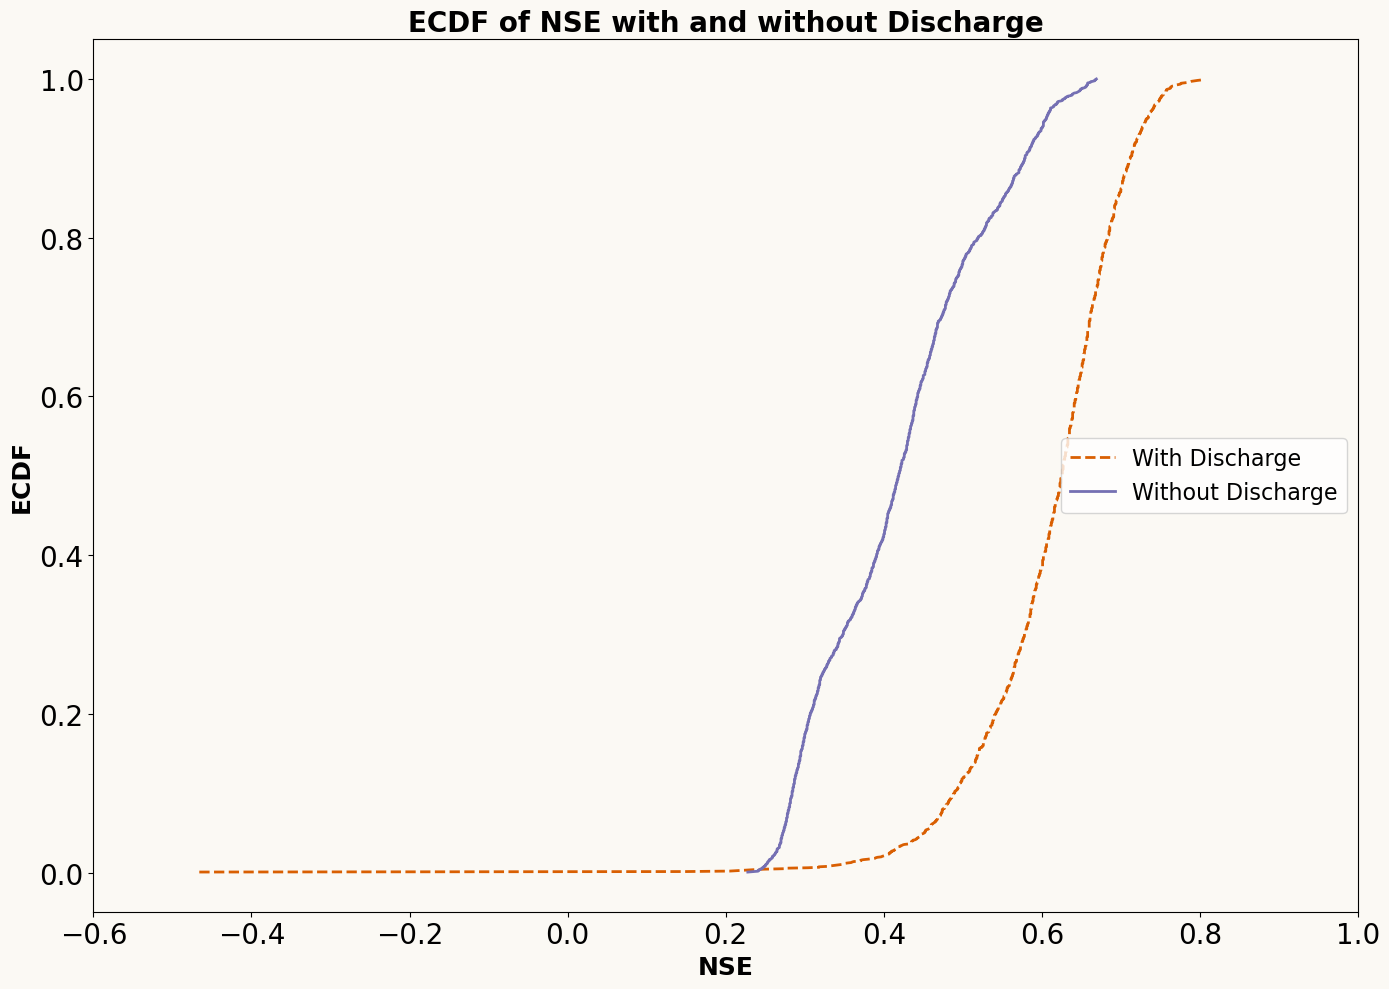

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

# Define colors and layout constants
# Colors
BG_WHITE = "#fbf9f4"
GREY_LIGHT = "#b4aea9"
GREY50 = "#7F7F7F"
BLUE_DARK = "#1B2838"
BLUE = "#2a475e"
BLACK = "#282724"
GREY_DARK = "#747473"
RED_DARK = "#850e00"

COLOR_SCALE = [ "#D95F02", "#7570B3"]

def plot_ecdf(nse_disch, nse_without_disch):
    # Extract and clean NSE column from both dataframes, removing NaN and negative values
    nse_disch_values = nse_disch['NSE'].dropna()
    #nse_disch_values = nse_disch_values[nse_disch_values >= 0]  # Keep only non-negative values

    nse_without_disch_values = nse_without_disch['NSE'].dropna()
    #nse_without_disch_values = nse_without_disch_values[nse_without_disch_values >= 0]  # Keep only non-negative values

    # Calculate the ECDF using statsmodels
    ecdf_disch = ECDF(nse_disch_values)
    ecdf_without_disch = ECDF(nse_without_disch_values)

    # Plotting
    fig, ax = plt.subplots(figsize=(14, 10))

    # Background color
    fig.patch.set_facecolor(BG_WHITE)
    ax.set_facecolor(BG_WHITE)


    # Plot ECDF for nse_disch
    ax.plot(ecdf_disch.x, ecdf_disch.y, label='With Discharge', color="#D95F02", lw=2,linestyle='dashed')

    # Plot ECDF for nse_without_disch
    ax.plot(ecdf_without_disch.x, ecdf_without_disch.y, label='Without Discharge', color="#7570B3", lw=2)

    # Add labels and legend
    ax.set_xlabel('NSE', size=18, weight='bold')
    ax.tick_params(axis='both', labelsize=16)
    ax.set_xlim([-0.6, 1])  # Limit x-axis to range 0 to 1
    ax.set_ylabel('ECDF', size=18, weight='bold')
    ax.set_title('ECDF of NSE with and without Discharge', size=20, weight='bold')
    ax.legend(loc='center right', fontsize=16)

    # Increase the font size of the ticks
    ax.tick_params(axis='both', which='major', labelsize=20)  # Set font size for both axes

    # Adjust layout
    # Adjust layout
    plt.tight_layout()
    plt.savefig('ecdf_plot.jpeg', dpi =1200)
    plt.show()


plot_ecdf(nse_disch, nse_without_disch)


In [8]:
# Assuming nse_without_disch and nse_disch are your input dataframes
# Merge the two dataframes on 'basin_id'
merged_df = pd.merge(nse_without_disch, nse_disch, on='basin_id', suffixes=('_without_disch', '_disch'))

# Calculate the difference between the two NSE columns
merged_df['NSE_difference'] =  merged_df['NSE_disch'] - merged_df['NSE_without_disch'] 


# Display the result
print(merged_df)

            basin_id  NSE_without_disch  NSE_disch  NSE_difference
0       GRDC_6140100              0.465      0.620           0.155
1       GRDC_6140101              0.465      0.638           0.173
2       GRDC_6140120              0.475      0.631           0.156
3       GRDC_6140130              0.403      0.583           0.180
4       GRDC_6140140              0.422      0.593           0.171
...              ...                ...        ...             ...
1799  camelsgb_95001              0.302      0.578           0.276
1800  camelsgb_96001              0.266      0.587           0.321
1801  camelsgb_96002              0.253      0.611           0.358
1802  camelsgb_96004              0.264      0.573           0.309
1803  camelsgb_97002              0.304      0.559           0.255

[1804 rows x 4 columns]


In [9]:
merged_df.to_csv("result_NSE_differences.csv")

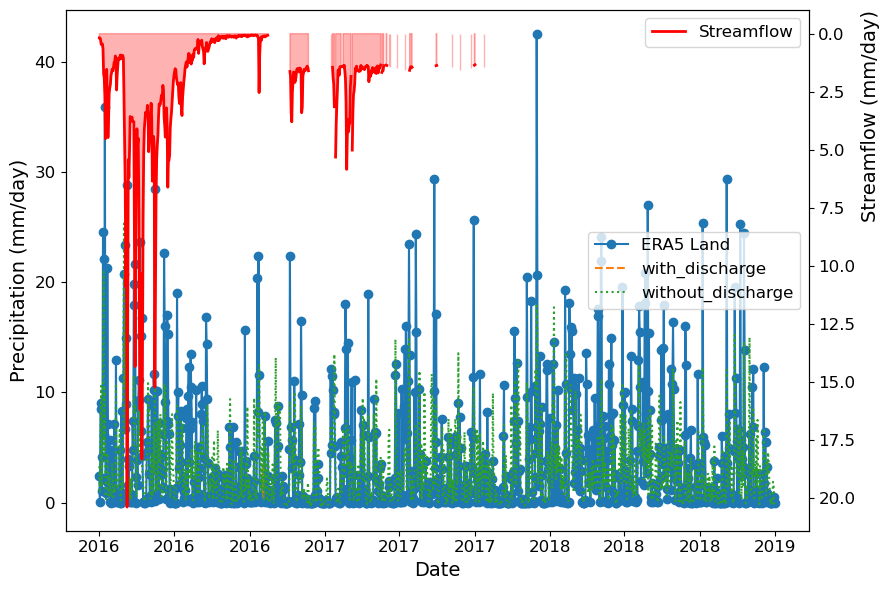

In [16]:
# Analysis for GRDC_6210410

import matplotlib.dates as mdates
# Define the function to plot data with an additional CSV streamflow plot
def plot_catchment_data_with_streamflow(y_obs, y_sim, y_sim_no_disch, csv_path,catchment, start_date, end_date):
    # Filter data by the specified date range
    y_obs_filtered = y_obs.loc[start_date:end_date, catchment]
    y_sim_filtered = y_sim.loc[start_date:end_date, catchment]
    y_sim_no_disch_filtered = y_sim_no_disch.loc[start_date:end_date, catchment]

    # Read the CSV file for streamflow data
    streamflow_df = pd.read_csv(csv_path, parse_dates=True, index_col=0)
    
    # Filter the streamflow data
    streamflow_filtered = streamflow_df.loc[start_date:end_date, 'streamflow']

    # Plotting
    fig, ax1 = plt.subplots(figsize=(9, 6))

    # Plot the existing dataframes
    ax1.plot(y_obs_filtered.index, y_obs_filtered, label='ERA5 Land', marker='o')
    ax1.plot(y_sim_filtered.index, y_sim_filtered, label='with_discharge', linestyle='--')
    ax1.plot(y_sim_no_disch_filtered.index, y_sim_no_disch_filtered, label='without_discharge', linestyle=':')

    # Add labels and legend to the primary y-axis
    ax1.set_xlabel('Date', fontsize=14)
    ax1.set_ylabel('Precipitation (mm/day)', fontsize=14)
    #ax1.set_title(f'Catchment: Elsenz Schwarzbach from {start_date} to {end_date}')
    ax1.legend(loc='center right', fontsize=12)
    # Formatting tick labels
    ax1.tick_params(axis='both', labelsize=12)
    # Create a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(streamflow_filtered.index, streamflow_filtered, label='Streamflow', color='red', linestyle='-', linewidth=2)
    ax2.fill_between(streamflow_filtered.index, streamflow_filtered, color='red', alpha=0.3)
    ax2.set_ylabel('Streamflow (mm/day)', loc='top', fontsize=14)
    ax2.legend(loc='upper right', fontsize=12)
    ax2.tick_params(axis='both', labelsize=12)
    ax2.invert_yaxis()
   
    # Format the date labels on the x-axis
    date_format = mdates.DateFormatter('%Y')
    ax1.xaxis.set_major_formatter(date_format)
    #fig.autofmt_xdate()  # Rotate date labels
    # Formatting the plot
    #plt.xticks(rotation=45)
    plt.tight_layout()
    
    #plt.savefig('hydrograph.jpeg',dpi=1200)
    # Show the plot
    plt.show()

# Example Usage
catchment = 'GRDC_6210410'  # Specify the column name corresponding to the catchment
csv_path = rf"{catchment}.csv"
start_date = '2016-01-01'
end_date = '2018-12-31'
plot_catchment_data_with_streamflow(y_obs, y_sim, y_sim_no_disch, csv_path, catchment, start_date, end_date)

In [19]:
start_date = '2006-01-01'
end_date = '2020-12-31'
y_sim_filtered = y_sim.loc[start_date:end_date, catchment]

In [20]:
y_sim_filtered

Unnamed: 0
2006-01-01   NaN
2006-01-02   NaN
2006-01-03   NaN
2006-01-04   NaN
2006-01-05   NaN
              ..
2020-12-27   NaN
2020-12-28   NaN
2020-12-29   NaN
2020-12-30   NaN
2020-12-31   NaN
Name: GRDC_6210410, Length: 5479, dtype: float64